## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
from keras.layers import Dropout

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.45]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout_exp in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with SGD, Dropout = %.2f" % dropout_exp)

    model = model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_exp)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-SGD-drop-%s" % str(dropout_exp)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
for dropout_exp in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Adam, Dropout = %.2f" % dropout_exp)

    model = model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_exp)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-Adam-drop-%s" % str(dropout_exp)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with SGD, Dropout = 0.25
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)    

50000/50000 [==============================] - 3s 57us/step - loss: 1.3046 - accuracy: 0.5325 - val_loss: 1.3217 - val_accuracy: 0.5266
Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.3038 - accuracy: 0.5340 - val_loss: 1.3084 - val_accuracy: 0.5323
Epoch 48/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.2998 - accuracy: 0.5359 - val_loss: 1.3269 - val_accuracy: 0.5226
Epoch 49/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.2924 - accuracy: 0.5366 - val_loss: 1.3117 - val_accuracy: 0.5253
Epoch 50/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.2832 - accuracy: 0.5416 - val_loss: 1.3093 - val_accuracy: 0.5303
Experiment with SGD, Dropout = 0.45
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_____________________

50000/50000 [==============================] - 3s 60us/step - loss: 1.5655 - accuracy: 0.4405 - val_loss: 1.4525 - val_accuracy: 0.4845
Epoch 42/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5584 - accuracy: 0.4433 - val_loss: 1.4501 - val_accuracy: 0.4835
Epoch 43/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5519 - accuracy: 0.4465 - val_loss: 1.4472 - val_accuracy: 0.4815
Epoch 44/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5492 - accuracy: 0.4438 - val_loss: 1.4463 - val_accuracy: 0.4868
Epoch 45/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5484 - accuracy: 0.4456 - val_loss: 1.4427 - val_accuracy: 0.4842
Epoch 46/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5473 - accuracy: 0.4473 - val_loss: 1.4435 - val_accuracy: 0.4818
Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5373 - accuracy: 0.4534 - val_loss: 1.4460

50000/50000 [==============================] - 3s 65us/step - loss: 1.5057 - accuracy: 0.4602 - val_loss: 1.4589 - val_accuracy: 0.4872
Epoch 37/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.4995 - accuracy: 0.4618 - val_loss: 1.4716 - val_accuracy: 0.4741
Epoch 38/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.4954 - accuracy: 0.4642 - val_loss: 1.4651 - val_accuracy: 0.4777
Epoch 39/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.4979 - accuracy: 0.4618 - val_loss: 1.4360 - val_accuracy: 0.4899
Epoch 40/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.4899 - accuracy: 0.4670 - val_loss: 1.4410 - val_accuracy: 0.4931
Epoch 41/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.4920 - accuracy: 0.4670 - val_loss: 1.4400 - val_accuracy: 0.4919
Epoch 42/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.4846 - accuracy: 0.4659 - val_loss: 1.4459

50000/50000 [==============================] - 3s 66us/step - loss: 1.8474 - accuracy: 0.3213 - val_loss: 1.8464 - val_accuracy: 0.3638
Epoch 32/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.8389 - accuracy: 0.3232 - val_loss: 1.8316 - val_accuracy: 0.3577
Epoch 33/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8361 - accuracy: 0.3254 - val_loss: 1.8629 - val_accuracy: 0.3369
Epoch 34/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8394 - accuracy: 0.3240 - val_loss: 1.8166 - val_accuracy: 0.3383
Epoch 35/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.8358 - accuracy: 0.3258 - val_loss: 1.8483 - val_accuracy: 0.3601
Epoch 36/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.8316 - accuracy: 0.3260 - val_loss: 1.8304 - val_accuracy: 0.3616
Epoch 37/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8363 - accuracy: 0.3259 - val_loss: 1.8558

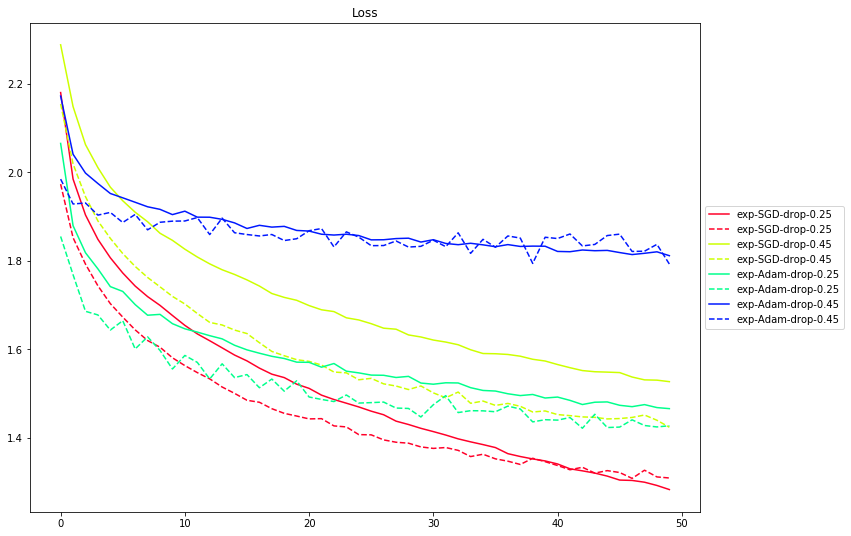

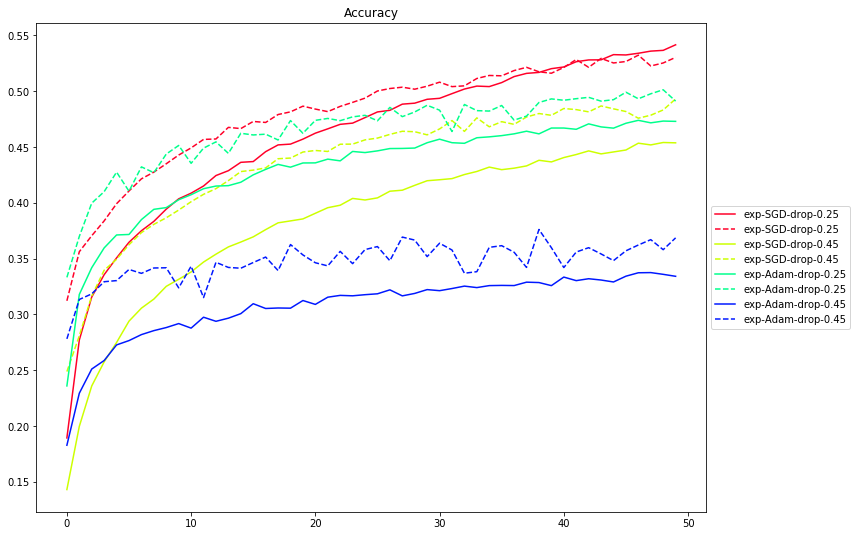

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()